# Project 1

Made by:                                                                                                                       
Tsourakis Orfeas(sdi1700175)                                                                                                   
Taratsas Ioannis(sdi1700160)

## QUERIES 

Here we are going to import the libraries that we will use 

In [1]:
import pandas as pd
import numpy as np
import csv
import os,sys
import matplotlib.pyplot as plt
import folium as folium
import webbrowser
from PIL import Image
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator
from nltk.stem import WordNetLemmatizer
import nltk
from IPython.display import Image
import seaborn as sns

These features(list and function) help us to make our train.csv.

In [2]:
list=["listing_id", "zipcode", "transit", "bedrooms", "beds", "review_scores_rating", "number_of_reviews", 
      "neighbourhood", "neighbourhood_group" ,"name", "latitude" ,"longitude", "last_review", "instant_bookable", 
      "host_since", "host_response_rate", "host_identity_verified", "host_has_profile_pic",
      "first_review", "description", "city", "cancellation_policy",      
      "bed_type", "bathrooms", "accommodates", "amenities", "room_type", "property_type", 
      "price", "availability_365" ,"minimum_nights"]  #here are the columns of the new dataframe

def MakeDataFrame(df,list):      #This function keeps the columns that we gonna
    for y in df.columns:         #use and delete the others
        if y not in list:
            del df[y]
    for x in list:
        if x not in df.columns:
            df[x]=np.nan

Here we insert the data of each month from the csvs, we fill the nan values properly(if column type is float-> we fill with the mean, else we fill the value with '-') and df_out_all is now our complete train.csv!

In [3]:
#INSERTION OF DATA FOR FEBRUARY

flag=False

Location=r'C:\Tede\data\febrouary\listings0.csv'
df1 = pd.read_csv(Location)

if 'id' in df1.columns:                                      
    df1=df1.rename(columns={"id": "listing_id"}) #rename the id col so we can merge with the other files(reviews,etc)
    MakeDataFrame(df1,list)
    if flag == False: # if first time
        df_out = df1.copy()
        flag = True
    else:  # else smart combine 
        df_out = df_out.set_index('listing_id').combine_first(df1.set_index('listing_id')).reset_index()

Location=r'C:\Tede\data\febrouary\listings.csv'
df1 = pd.read_csv(Location)

if 'id' in df1.columns:
    df1=df1.rename(columns={"id": "listing_id"})
    MakeDataFrame(df1,list)
    if flag == False:
        df_out = df1.copy()
        flag = True
    else:
        df_out = df_out.set_index('listing_id').combine_first(df1.set_index('listing_id')).reset_index()
    
#INSERTION OF DATA FOR MARCH

flag=False

Location=r'C:\Tede\data\march\listings0.csv'
df1 = pd.read_csv(Location)

if 'id' in df1.columns:
    df1=df1.rename(columns={"id": "listing_id"})
    MakeDataFrame(df1,list)
    if flag == False:
        df_out1 = df1.copy()
        flag = True
    else:
        df_out1 = df_out1.set_index('listing_id').combine_first(df1.set_index('listing_id')).reset_index()

Location=r'C:\Tede\data\march\listings.csv'
df1 = pd.read_csv(Location)

if 'id' in df1.columns:
    df1=df1.rename(columns={"id": "listing_id"})
    MakeDataFrame(df1,list)
    if flag == False:
        df_out1 = df1.copy()
        flag = True
    else:
        df_out1 = df_out1.set_index('listing_id').combine_first(df1.set_index('listing_id')).reset_index()

#INSERTION DATA FOR APRIL

flag=False

Location=r'C:\Tede\data\april\listings0.csv'
df1 = pd.read_csv(Location)

if 'id' in df1.columns:
    df1=df1.rename(columns={"id": "listing_id"})
    MakeDataFrame(df1,list)
    if flag == False:
        df_out2 = df1.copy()
        flag = True
    else:
        df_out2 = df_out2.set_index('listing_id').combine_first(df1.set_index('listing_id')).reset_index()

Location=r'C:\Tede\data\april\listings.csv'
df1 = pd.read_csv(Location)

if 'id' in df1.columns:
    df1=df1.rename(columns={"id": "listing_id"})
    MakeDataFrame(df1,list)
    if flag == False:
        df_out2 = df1.copy()
        flag = True
    else:
        df_out2 = df_out2.set_index('listing_id').combine_first(df1.set_index('listing_id')).reset_index()

#Extra column Month
df_out["Month"]="february"
df_out1["Month"]="march"
df_out2["Month"]="april"

#3 months concat
pdList=[df_out,df_out1,df_out2]
df_out_all=pd.concat(pdList,ignore_index=True)

#fill nan
x=df_out_all.columns[df_out_all.isna().all()].tolist()
df_out_all[x]=df_out_all[x].fillna(value="-")
new=df_out_all.select_dtypes(include=['float64']).columns.tolist()
for x in new:
    df_out_all[x].fillna(df_out_all[x].mean(),inplace=True)

df_out_all.fillna("-", inplace = True)

df_out_all.to_csv (r'C:\Tede\train.csv', index = False, header=True)

C:\Users\user\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (61,62) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


First Query: Find the most common room_type from our data!

The most common room type is: Entire home/apt based on the graph below.


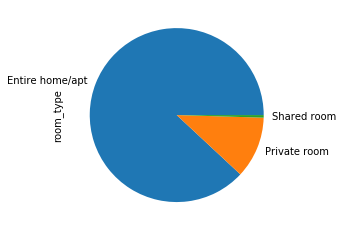

In [4]:
temp=df_out_all['room_type'].value_counts()
temp.plot.pie()
print('The most common room type is:', temp.index[0], 'based on the graph below.')

Second Query: Show the route of the values based on each month 

Month
february    65.497912
march       64.894456
april       64.363730
Name: price, dtype: float64

So following the diagram results we see that there is a significant decrease in the price


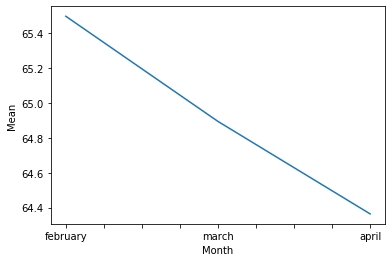

In [5]:
temp = df_out_all.copy()
temp=temp.groupby(['Month'])['price'].mean()
ax=temp.reindex(['february','march','april']).plot()
ax.set_xlabel('Month')
ax.set_ylabel('Mean')
print(temp.reindex(['february','march','april']))
print('\nSo following the diagram results we see that there is a significant decrease in the price')

Third Query: Find Top-5 neighbourhoods with the most reviews

Top-5 neighbourhoods are:

neighbourhood
ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ              167170
ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ                  90687
ΝΕΟΣ ΚΟΣΜΟΣ                          69102
ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ             59293
ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ     49427
Name: number_of_reviews, dtype: int64


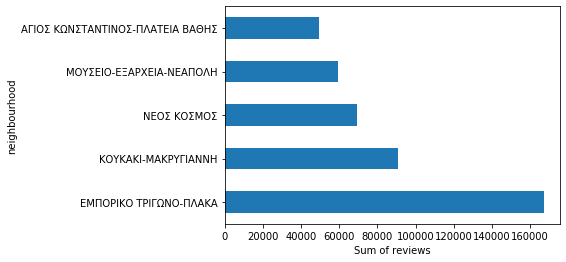

In [6]:
temp = df_out_all.copy()

temp=temp.groupby(['neighbourhood'])['number_of_reviews'].sum()
temp=temp.sort_values(ascending=False).head(5)
ax=temp.plot.barh()
ax.set_xlabel('Sum of reviews')
print('Top-5 neighbourhoods are:\n')
print(temp)

Fourth Query: Find the neighbourhood with most properties

The graph shows top-12 neighbourhoods with the most properties.
As we can see, ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ has the most properties.


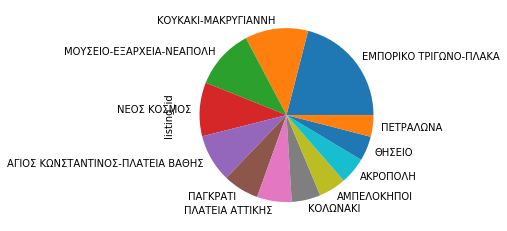

In [7]:
temp = df_out_all.copy()
temp=temp.groupby(['neighbourhood'])['listing_id'].count()
temp=temp.sort_values(ascending=False)
temp=temp.head(12)
temp.plot.pie()
print('The graph shows top-12 neighbourhoods with the most properties.\n'
      'As we can see,', temp.index[0], 'has the most properties.')

Fifth Query: Show every listing per neighbourhood every month

neighbourhood                     Month   
1Ο ΝΕΚΡΟΤΑΦΕΙΟ                    april         41
                                  february      42
                                  march         43
ΑΓΙΟΣ ΕΛΕΥΘΕΡΙΟΣ                  april         28
                                  february      32
                                  march         34
ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ  april        607
                                  february     571
                                  march        603
ΑΓΙΟΣ ΝΙΚΟΛΑΟΣ                    april         63
                                  february      54
                                  march         60
ΑΚΑΔΗΜΙΑ ΠΛΑΤΩΝΟΣ                 april         83
                                  february      76
                                  march         82
ΑΚΡΟΠΟΛΗ                          april        344
                                  february     323
                                  march        327
ΑΜΠΕΛΟΚΗΠΟΙ                       april

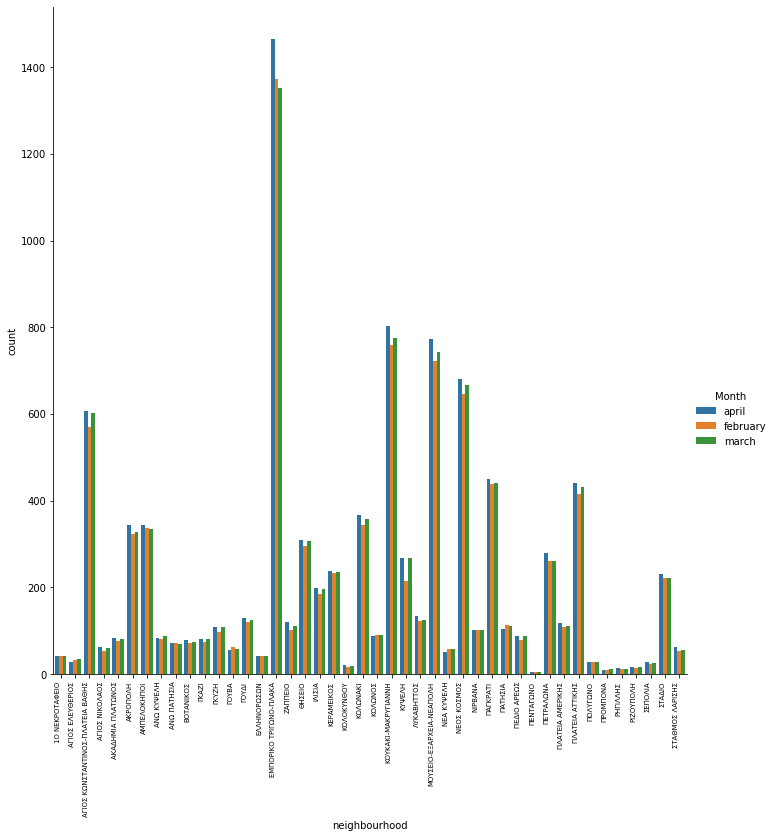

In [8]:
temp = df_out_all.copy()
temp1=temp.groupby(['neighbourhood','Month']).count()
temp=temp.groupby(['neighbourhood','Month'])['listing_id'].count()
with pd.option_context('display.max_rows', 999):
   print(temp)

temp1=temp1.reset_index()
sns.catplot(x='neighbourhood', y="listing_id", hue="Month", data=temp1, kind="bar",height=10)
plt.xticks(
    rotation=90, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-small'  
)
plt.ylabel('count')
plt.show()

Sixth Query: Make the histogram of variable neighbourhood

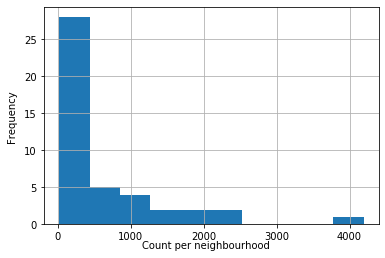

In [9]:
temp = df_out_all.copy()
x=temp['neighbourhood'].value_counts()
fig, axes = plt.subplots(nrows=1, ncols=1, sharex=True, sharey=True)
fig.text(0.5, 0.04, 'Count per neighbourhood', ha='center')
fig.text(0.04, 0.5, 'Frequency', va='center', rotation='vertical')
x.hist()

Seventh Query: Find the most common room_type per neighbourhood

Here are the results:

                    neighbourhood        room_type
           ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ  Entire home/apt
              ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ  Entire home/apt
         ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ  Entire home/apt
                      ΝΕΟΣ ΚΟΣΜΟΣ  Entire home/apt
 ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ  Entire home/apt
                         ΠΑΓΚΡΑΤΙ  Entire home/apt
                  ΠΛΑΤΕΙΑ ΑΤΤΙΚΗΣ  Entire home/apt
                         ΚΟΛΩΝΑΚΙ  Entire home/apt
                      ΑΜΠΕΛΟΚΗΠΟΙ  Entire home/apt
                         ΑΚΡΟΠΟΛΗ  Entire home/apt
                           ΘΗΣΕΙΟ  Entire home/apt
                        ΠΕΤΡΑΛΩΝΑ  Entire home/apt
                           ΣΤΑΔΙΟ  Entire home/apt
                       ΚΕΡΑΜΕΙΚΟΣ  Entire home/apt
                           ΚΥΨΕΛΗ  Entire home/apt
                           ΙΛΙΣΙΑ  Entire home/apt
                       ΛΥΚΑΒΗΤΤΟΣ  Entire home/apt
                            ΓΟΥΔΙ  Entire home/apt
        

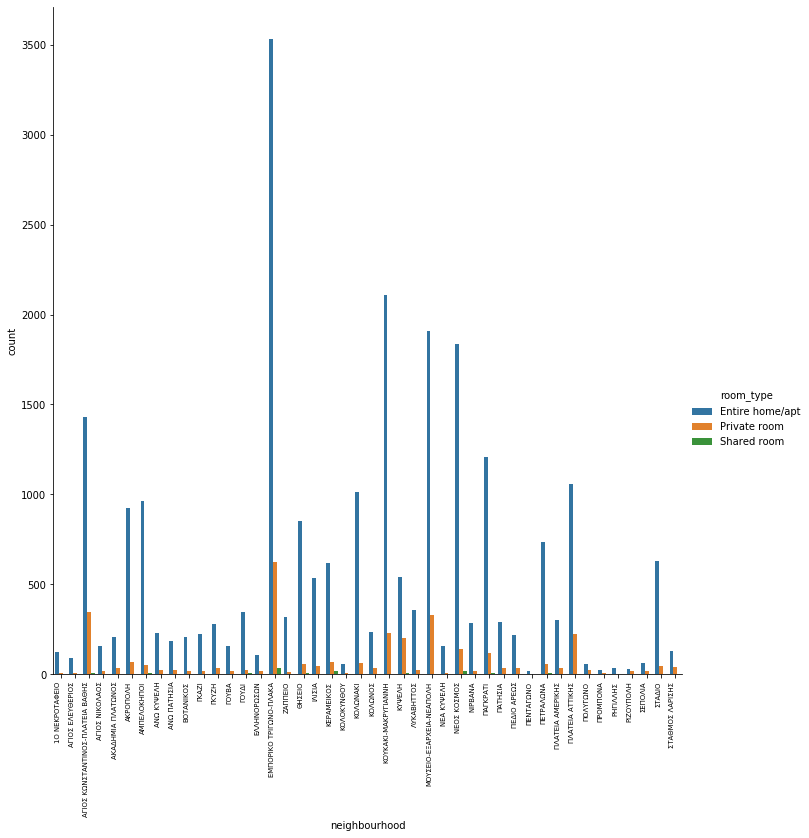

In [10]:
temp = df_out_all.copy()
temp1=temp.groupby(['neighbourhood','room_type']).count()
temp=temp.groupby(['neighbourhood','room_type']).count()['listing_id'].sort_values(ascending=False)  
#code to remove duplicates
temp=temp.reset_index()
temp = temp.drop_duplicates(subset=['neighbourhood'], keep='first')
temp=temp.set_index(['neighbourhood','room_type'])

temp=temp.reset_index()
print("Here are the results:\n")
print(temp.to_string(columns=['neighbourhood', 'room_type'],index=False))

temp1=temp1.reset_index()
sns.catplot(x='neighbourhood', y="listing_id", hue="room_type", data=temp1, kind="bar",height=10)
plt.xticks(
    rotation=90, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-small'  
)

plt.ylabel('count')
plt.show()

Eighth Query: Find the most expensive room_type 

Private room is the most expensive by mean room_type


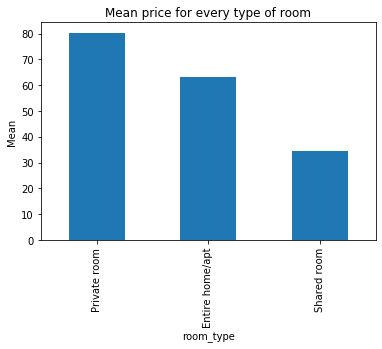

In [11]:
temp = df_out_all.copy()
temp=temp.groupby(['room_type'])['price'].mean()
temp=temp.sort_values(ascending=False)
temp.index[0]

ax=temp.plot.bar()
ax.set_title('Mean price for every type of room')
ax.set_ylabel('Mean')
print(temp.index[0], 'is the most expensive by mean room_type')


In [12]:
temp = df_out_all.copy()
index=temp['price'].idxmax()
x=temp.loc[index]
print(' We also found that the most expensive room_type that exists in listing is:\n',
x['room_type'])

 We also found that the most expensive room_type that exists in listing is:
 Private room


Ninth Query: Make a Folium map 

We took the first 800 listings of February and we made the folium map. We couldn't appear the map in the notebook so we show a screenshot of the map, and we put the map.html separately in the file that we assigned

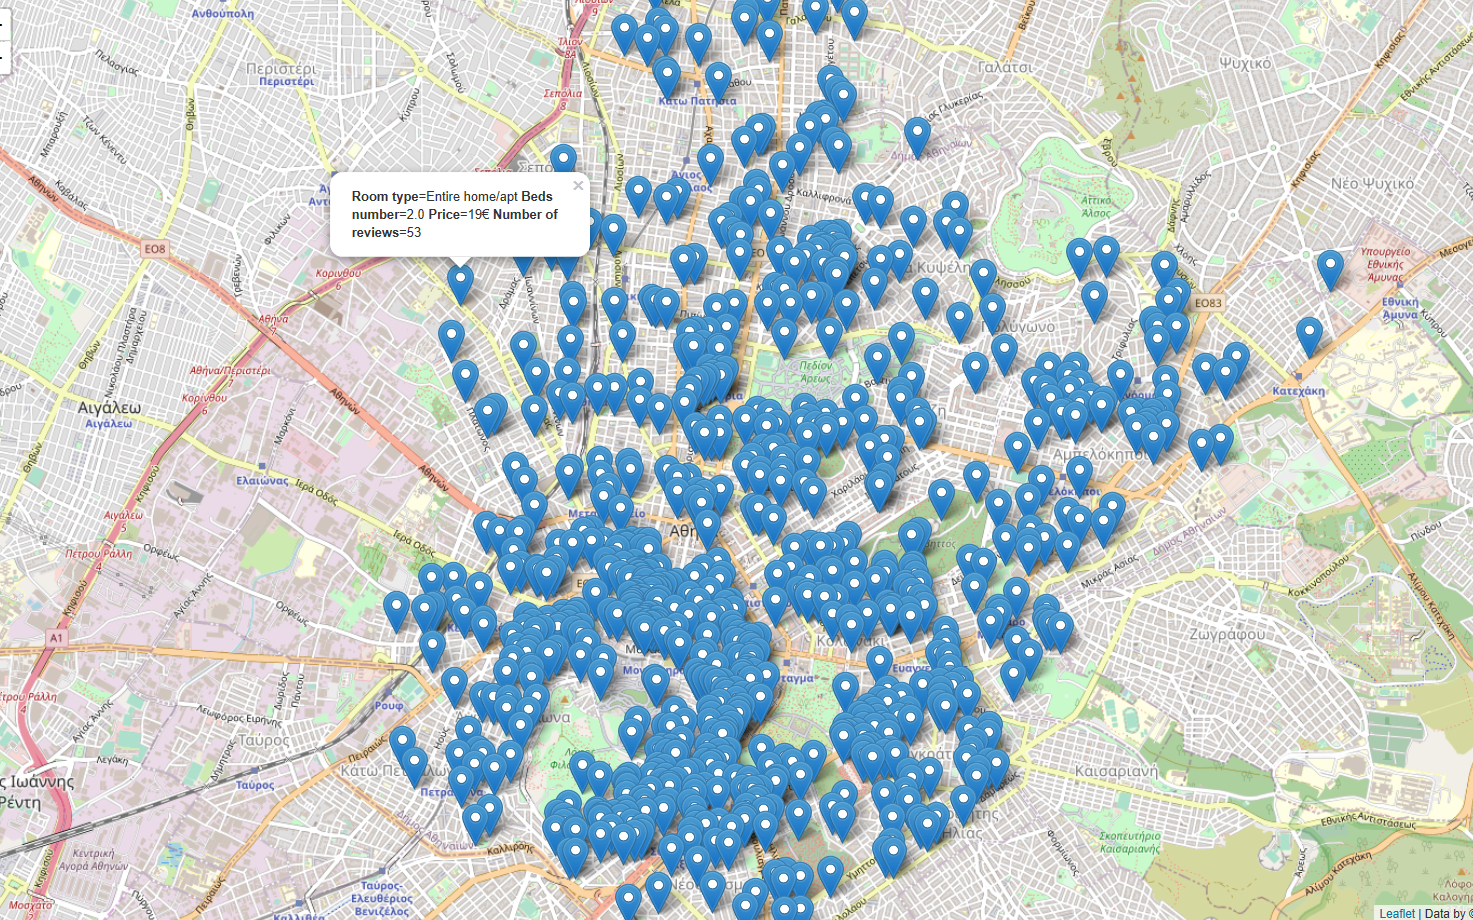

In [13]:
m=folium.Map(location=[37.983810,23.727539],zoom_start=13) # create Athens map

temp = df_out_all.copy()
i=0
for i in range(800):
    x=temp.iloc[i]['latitude']
    y=temp.iloc[i]['longitude']
    tooltip=' Click for more info'
    popup="<strong>Room type</strong>="+str(temp.iloc[i]['room_type'])+"\n<strong>Beds number</strong>="+str(temp.iloc[i]['beds'])+"\n<strong>Price</strong>="+str(temp.iloc[i]['price'])+"€"+"\n<strong>Number of reviews</strong>="+str(temp.iloc[i]['number_of_reviews'])  
    folium.Marker([x,y],popup=folium.Popup(popup, max_width=200),
                 tooltip=tooltip).add_to(m)
m.save('map.html')
webbrowser.open('file://' + os.path.realpath('map.html'))
Image('C:\Tede\map.png')

Tenth Query: Make wordclouds with data from columns neighbourhood,transit, description and last_review.

First Wordcloud: Neighbourhood

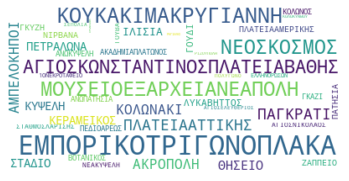

In [14]:
temp = df_out_all.copy()

#code to make columns-> one string and remove spaces and symbols from names
text=temp.neighbourhood.str.cat(sep=',')
text=text.replace('-','')
text=text.replace(' ','')
wordcloud=WordCloud(max_font_size=60, max_words=100,collocations=False,background_color="white").generate(text)

#This is how u show a wordcloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Second Wordcloud: Transit

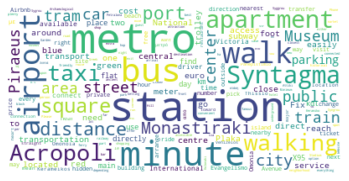

In [15]:
temp = df_out_all.copy()

#Create stopwords
stopwords=set(STOPWORDS)
stopwords.update(["min","line","away","stop","bu","will","take","Athens","house","well","easy","many","within"])
temp=temp.drop_duplicates(subset=['listing_id'], keep='first')
text=temp.transit.str.cat(sep=' ')

lemmatizer = WordNetLemmatizer()
word_list = nltk.word_tokenize(text)
# Lemmatize list of words and join
text = ' '.join([lemmatizer.lemmatize(w) for w in word_list])
    
wordcloud=WordCloud(max_font_size=50, max_words=200,stopwords=stopwords,collocations=False,background_color="white").generate(text)

#This is how u show a wordcloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


Third Wordcloud: Description

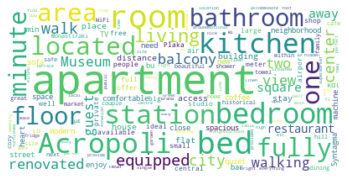

In [16]:
temp = df_out_all.copy()
#Create stopwords
stopwords=set(STOPWORDS)
stopwords.update(["will","Athens","double",'ha','metro'])
temp=temp.drop_duplicates(subset=['listing_id'], keep='first')
text=temp.description.str.cat(sep=' ')
lemmatizer = WordNetLemmatizer()
word_list = nltk.word_tokenize(text)
# Lemmatize list of words and join
text = ' '.join([lemmatizer.lemmatize(w) for w in word_list])
    
wordcloud_desc=WordCloud(max_font_size=50, max_words=200,stopwords=stopwords,collocations=False,background_color="white").generate(text)

#This is how u show a wordcloud
plt.imshow(wordcloud_desc, interpolation='bilinear')
plt.axis("off")
plt.show()

Fourth Wordcloud: Last Review

First we must take the data from reviews.csv that are not in our train.csv and we make a new dataframe 

In [17]:
#READ REVIEWS

Location=r'C:\Tede\data\febrouary\reviews.csv'
df1 = pd.read_csv(Location)

Location=r'C:\Tede\data\march\reviews.csv'
df2 = pd.read_csv(Location)

Location=r'C:\Tede\data\april\reviews.csv'
df3 = pd.read_csv(Location)

df1=df1.rename(columns={"date": "last_review"})
df2=df2.rename(columns={"date": "last_review"})
df3=df3.rename(columns={"date": "last_review"})

#split dataframe to every month
temp = df_out_all.copy()
temp1=temp[temp['Month'] == 'february']
temp2=temp[temp['Month'] == 'march']
temp3=temp[temp['Month'] == 'april']

#merge dataframes
new1=pd.merge(temp1, df1, on=['listing_id','last_review'], how='inner')
new2=pd.merge(temp2, df2, on=['listing_id','last_review'], how='inner')
new3=pd.merge(temp3, df1, on=['listing_id','last_review'], how='inner')

pdList=[new1,new2,new3]
new=pd.concat(pdList,ignore_index=True)

For each listing we keep only one review, the last one!

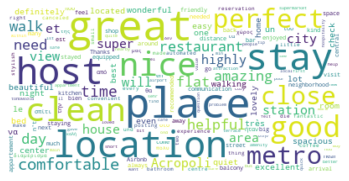

In [18]:
#find last last_reviews for each apartment
new = new[new.groupby('listing_id').last_review.transform('max') == new['last_review']]
new=new.drop_duplicates(subset=['listing_id'], keep='first')

#then make the wordcloud
stopwords=set(STOPWORDS)
stopwords=set(STOPWORDS)
stopwords.update(["everything","Athens","wa","ha","το","la","minute","και","είναι","definetely","με","πολύ","για","σε","apartment","recommend","de","really","Thank","us","well"])


text=new.comments.str.cat(sep=' ')

lemmatizer = WordNetLemmatizer()
word_list = nltk.word_tokenize(text)
# Lemmatize list of words and join
text = ' '.join([lemmatizer.lemmatize(w) for w in word_list])

wordcloud=WordCloud(max_font_size=50, max_words=200,stopwords=stopwords,collocations=False,background_color="white").generate(text)

#This is how u show a wordcloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Twelfth Query: Two more questions...

Which are the three least common bed types?

bed_type
Airbed     6
Couch     18
Futon     18
Name: listing_id, dtype: int64

The 3 least common bed_types that we found are:


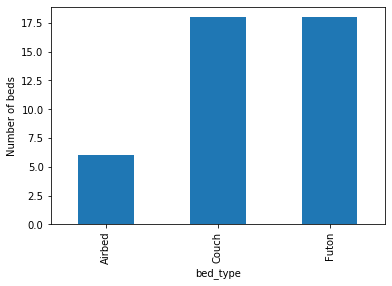

In [19]:
temp = df_out_all.copy()
temp=temp.groupby(['bed_type'])['listing_id'].count()
temp=temp.sort_values(ascending=True)
temp=temp.head(3)
ax=temp.plot.bar()
ax.set_ylabel('Number of beds')
print(temp)
print("\nThe 3 least common bed_types that we found are:" )

Which is the max price of a listing in each neighbourhood?

In [20]:
temp = df_out_all.copy()
temp.groupby(['neighbourhood'])['price'].max()

neighbourhood
1Ο ΝΕΚΡΟΤΑΦΕΙΟ                       412
ΑΓΙΟΣ ΕΛΕΥΘΕΡΙΟΣ                     180
ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ     500
ΑΓΙΟΣ ΝΙΚΟΛΑΟΣ                       127
ΑΚΑΔΗΜΙΑ ΠΛΑΤΩΝΟΣ                    300
ΑΚΡΟΠΟΛΗ                             640
ΑΜΠΕΛΟΚΗΠΟΙ                          300
ΑΝΩ ΚΥΨΕΛΗ                           210
ΑΝΩ ΠΑΤΗΣΙΑ                          150
ΒΟΤΑΝΙΚΟΣ                            250
ΓΚΑΖΙ                                350
ΓΚΥΖΗ                                600
ΓΟΥΒΑ                                299
ΓΟΥΔΙ                                210
ΕΛΛΗΝΟΡΩΣΩΝ                          400
ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ              5000
ΖΑΠΠΕΙΟ                             1000
ΘΗΣΕΙΟ                               525
ΙΛΙΣΙΑ                               240
ΚΕΡΑΜΕΙΚΟΣ                           810
ΚΟΛΟΚΥΝΘΟΥ                            76
ΚΟΛΩΝΑΚΙ                             666
ΚΟΛΩΝΟΣ                               99
ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ                 7000
ΚΥ

## RECOMMENDATION SYSTEM 

Here we are going to import the extra libraries that we will use for this query

In [21]:
from nltk.corpus import stopwords
import re 
from sklearn.feature_extraction.text import TfidfVectorizer 
from nltk.tokenize import word_tokenize 
from sklearn.metrics.pairwise import cosine_similarity
from collections import defaultdict
from nltk.collocations import *
import collections

These functions are gonna help us with the queries

In [22]:
def remove_string_special_characters(s): 
    
    stripped=s.translate ({ord(c): " " for c in '!@#$%^&*()[]{};:,./<>?\|`~-=_+–…”❤️★⭐♥’’•"'})
    
    # Change any white space to one space 
    stripped = re.sub('\s+', ' ', stripped) 
    
    # Remove start and end white spaces 
    stripped = stripped.strip() 
    if stripped != '': 
            return stripped.lower()
        
def print_dict(dct):
    print("key        value")
    for item, amount in dct.items():  
        print("{} : {}".format(item, amount))
        
def k_largest_index_argsort(a, k):
    idx = np.argsort(a.ravel())[:-k-1:-1]
    return np.column_stack(np.unravel_index(idx, a.shape))

def recommend(item_id,num,tfidf,df_out_all):
    temp=df_out_all.copy()
    temp=temp.drop_duplicates(subset=['listing_id'], keep='first') 
    temp=temp.reset_index()
    cosineSimilarities = cosine_similarity(tfidf,tfidf)   #calculate again all cosinesimilarities
    h=temp['listing_id'].to_dict()                        #map index to listing_id
    hnew= {v: k for k, v in h.items()}                    #map listing_id to index  
    cosineSimilarities[hnew[item_id]][hnew[item_id]]=-1   #set -1 to avoid matching with itself
    a=cosineSimilarities[hnew[item_id]]                   #get row of the array
    l=k_largest_index_argsort(a, num).tolist()            #get top-num
    title='Recommending '+str(num)+' listings similar to '+str(temp.loc[temp['listing_id'] == item_id]['name'].tolist()[0])
    print(title)
    print('---------------------------------------------------------')
    for x in l:
        row=temp.loc[temp['listing_id'] == h[x[0]]]
        print('Recommended: ',row['name'].tolist()[0])
        print('Description: ',row['description'].tolist()[0])
        score='(score:'+str(a[x[0]])+')'
        print(score)
        print('\n')

Firstly, we gonna show the most used words that users use to describe Athens, based on the description wordcloud we made above


In [23]:
dic=wordcloud_desc.words_
collection=collections.Counter(dic).most_common(20)
for x in collection:
    print(x[0])

apartment
room
bed
bedroom
Acropoli
kitchen
station
located
fully
area
one
bathroom
floor
minute
living
equipped
city
walk
center
two


Here we make a new Dataframe with a new column that includes name and description(as asked)

In [24]:
temp = df_out_all.copy()
temp=temp[['listing_id','name','description']]

temp['all']=temp['name'] +' '+ temp['description']
del temp['name']
del temp['description']
temp=temp.drop_duplicates(subset=['listing_id'], keep='first')
temp=temp.reset_index()

test=temp['all'].tolist()
test=[]
for x in temp['all'].tolist():
    test.append(remove_string_special_characters(x))

First Task: Create the TF-IDF array 

In [25]:
stop_list = set(stopwords.words('english')) 
stop_list.update(set(STOPWORDS))                        #wordcloud stopwords

tfidf_vectorizer = TfidfVectorizer(max_df=1.0, min_df=1, ngram_range=(1,2), max_features=1000,
stop_words=stop_list)
tfidf = tfidf_vectorizer.fit_transform(test)
tfidf.toarray()

C:\Users\user\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['let'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Second Task: Calculate cosine similarity between listings, and print a dictionary with top 100 most similar listings

In [26]:
cosineSimilarities = cosine_similarity(tfidf,tfidf)
cosineSimilarities=np.triu(cosineSimilarities,1) #we avoid dublicates, by taking upper triangle array
k=k_largest_index_argsort(cosineSimilarities,100)#find top-100

h=temp['listing_id'].to_dict()# h = dictionary to convert k 2d array->listing_id
templist=[]
for x,y in k.tolist():
    templist.append([h[x],h[y]])
    
dictionary={}

for x in templist:
    dictionary[x[0]]=[]
for x in templist:
    dictionary[x[0]].append(x[1])

print_dict(dictionary)

key        value
23554220 : [23554464, 23554584]
23554464 : [23554584]
23552881 : [23554220, 23554464, 23554584]
30314687 : [30314693, 30314691]
30011086 : [30221476, 30178142]
29925898 : [30362269, 30341020, 30363015, 30089884, 30980510, 30980429, 30906405, 30760835, 30578520, 30373912, 30363275, 29945264, 29926293]
30341020 : [30760835, 30906405, 30980429, 30980510, 30578520, 30373912, 30363015, 30363275, 30362269]
31368270 : [32370704]
30359234 : [30360206]
30760835 : [30980510, 30980429, 30906405]
30362269 : [30980510, 30980429, 30906405, 30760835, 30578520, 30373912, 30363275, 30363015]
30373912 : [30578520, 30906405, 30980429, 30980510, 30760835]
21618263 : [21618310]
33595870 : [33596988]
21195111 : [21402471]
30578520 : [30980510, 30980429, 30906405, 30760835]
32855758 : [32856323, 32857172, 32878386]
30363275 : [30980510, 30980429, 30906405, 30760835, 30578520, 30373912]
29926293 : [29945264, 30341020]
30089884 : [30373912, 30341020, 30362269, 30363015, 30363275, 30578520, 307

Third Task: We have made reccomend function which gets as input and id and a number N, and prints the N most similar listings to the guven id. So here we have a test!

In [27]:
recommend(10595,10,tfidf,df_out_all)

Recommending 10 listings similar to 96m2, 3BR, 2BA, Metro, WI-FI etc...
---------------------------------------------------------
Recommended:  47m2, close to metro,cable TV,wi-fi
Description:  AQA No2 is 1-bedroom apartment (47m2)  -excellent located  -close to metro station,  -lovely,  -very clean  with all the facilities that you will need, nice balcony, excellent Wi-Fi, cable tv, fully air conditioned, etc... AQA No2 is an excellent located, close to metro, lovely, very clean 1-bedroom apartment (45 square meters) on the 2nd floor (there is elevator) with all the facilities that you will need and a very nice balcony facing the inner garden to enjoy your breakfast in the morning or relax in the evening. Separated Fully equipped kitchen with everything you need to prepare your lunch/dinner. Nice Living room to relax and enjoy a movie or a sport event. Clean nice bathroom. In case you are more than 2 people there is a sofa/bed in the living room. The studio has everything you will nee

Fourth Task: We used BigramCollocationFinder to find the top 10 words that tend to be together in the text. So here are the results!

In [28]:
test_string=''.join(test)
bigram_measures=nltk.collocations.BigramAssocMeasures()
tokens = nltk.wordpunct_tokenize(test_string)
finder = BigramCollocationFinder.from_words(
   tokens)
finder.apply_freq_filter(100)
ignored_words = nltk.corpus.stopwords.words('english')
finder.apply_word_filter(lambda w: len(w) < 3 or w.lower() in ignored_words)
print(finder.nbest(bigram_measures.likelihood_ratio, 10))

[('living', 'room'), ('fully', 'equipped'), ('metro', 'station'), ('walking', 'distance'), ('double', 'bed'), ('washing', 'machine'), ('equipped', 'kitchen'), ('brand', 'new'), ('air', 'conditioning'), ('syntagma', 'square')]
